In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
FILE_NAME = "Real_estate_valuation_dataset.xlsx"
DATA_FOLDER = "data"

main_path = os.getcwd()
file_path = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_NAME)

In [3]:
%%time

house_data = pd.read_excel(file_path)

CPU times: user 203 ms, sys: 37.5 ms, total: 241 ms
Wall time: 284 ms


In [4]:
house_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
house_data=house_data.rename(columns={"X1 transaction date":"transact_date",
                  "X2 house age":"house_age",
                  "X3 distance to the nearest MRT station":"station_dist",
                  "X4 number of convenience stores":"stores_num",
                  "X5 latitude":"latitude",
                  "X6 longitude":"longitude",
                  "Y house price of unit area":"house_price"})
house_data.head()

,No,transact_date,house_age,station_dist,stores_num,latitude,longitude,house_price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
house_data.shape

(414, 8)

In [7]:
#house_data.info()

In [8]:
target = house_data.iloc[:,-1]
target.head()
target.shape

(414,)

In [9]:
features = house_data.iloc[:,:-1]
features.head()
features.shape

(414, 7)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


featurestrain, featurestest, targettrain, targettest = train_test_split(features, target, random_state=1)

model = LinearRegression(fit_intercept=False)
model.fit(featurestrain,targettrain)
predicted = model.predict(featurestest)


In [13]:
# predicted

In [14]:
pd.DataFrame({'test':targettest,'predicted':predicted},columns = ['test','predicted'])

,test,predicted
388,27.3,34.369007
102,54.4,47.745113
187,22.0,17.793316
162,11.6,13.925739
90,45.4,44.262893
...,...,...
164,55.2,42.667091
228,46.6,32.543559
39,46.2,45.972945
261,24.4,30.563452


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
gbr = GradientBoostingRegressor()
gbr_model = gbr.fit(featurestrain, targettrain)
gbr_model

GradientBoostingRegressor()

In [29]:
print(gbr_model.get_params())

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [31]:
gbr_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [100,200],
             "subsample": [1,0.5,0.8],
             "loss": ["ls","lad","quantile"]}

In [33]:
gbr_cv=GridSearchCV(gbr_model,gbr_params,cv=10,n_jobs=-1,verbose=2).fit(featurestrain, targettrain)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=1; total time=   0.0s
[CV] EN

[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=200, subsample=1; total t

[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, 

[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=8, n_estimators=2

In [35]:
gbr_cv.best_params_

{'learning_rate': 0.1,
 'loss': 'quantile',
 'max_depth': 8,
 'n_estimators': 200,
 'subsample': 0.8}

[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, 

[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_es

[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, 

[CV] END learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=5, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, loss=lad, max_depth=5, n_estimators=200, 

[CV] END learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=1;

[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimat

[CV] END learning_rate=0.1, loss=lad, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=lad, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=lad, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=lad, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=lad, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=lad, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, loss=lad, max_depth=5, n_estimators=100, subsample=0.5; t

In [ ]:
# loading dataset using seaborn
df = seaborn.load_dataset('tips')
# pairplot with hue sex
seaborn.pairplot(df, hue ='sex')
# to show
plt.show()

In [5]:
sns.pairplot(data = house_data, hue="X4 number of convenience stores")
plt.show()

In [42]:
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.show()

<Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>

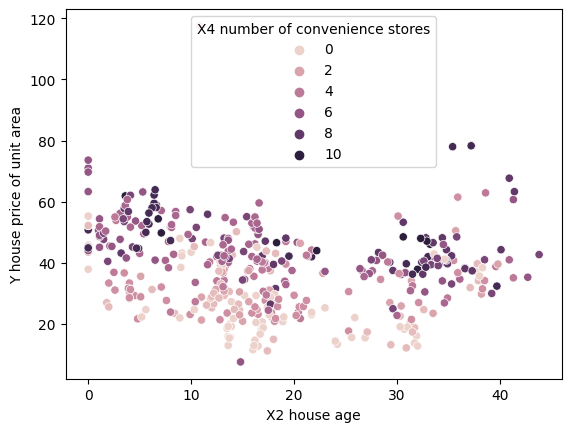

In [6]:
sns.scatterplot(data=house_data, x="X2 house age", y="Y house price of unit area",
                hue="X4 number of convenience stores")

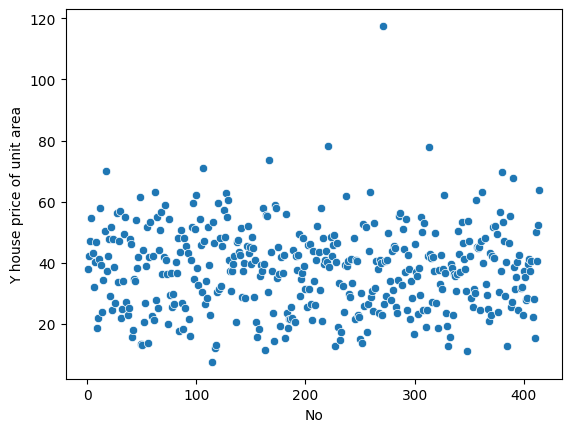

No


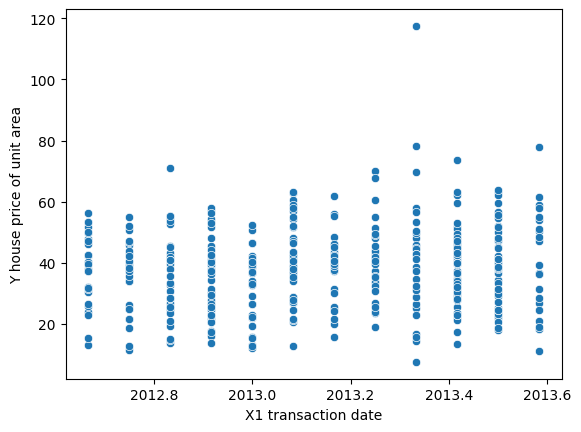

X1 transaction date


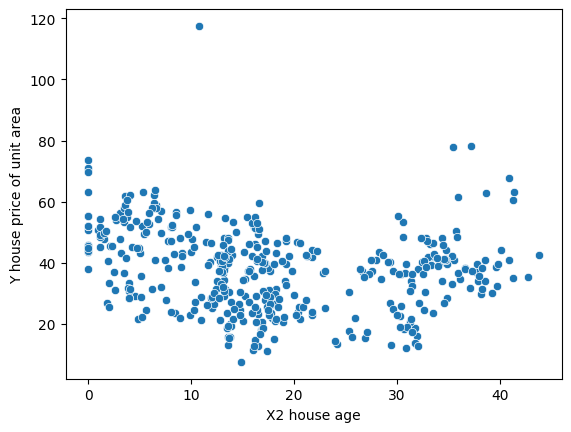

X2 house age


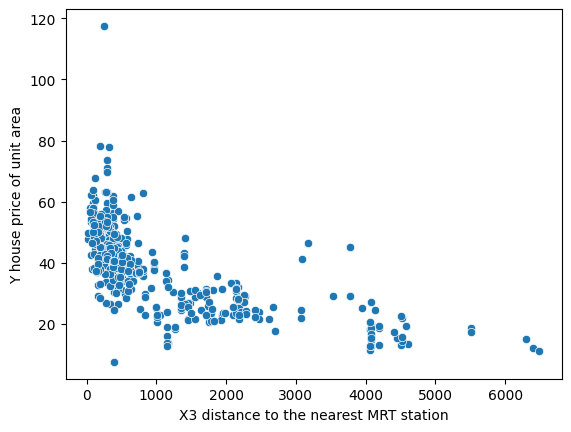

X3 distance to the nearest MRT station


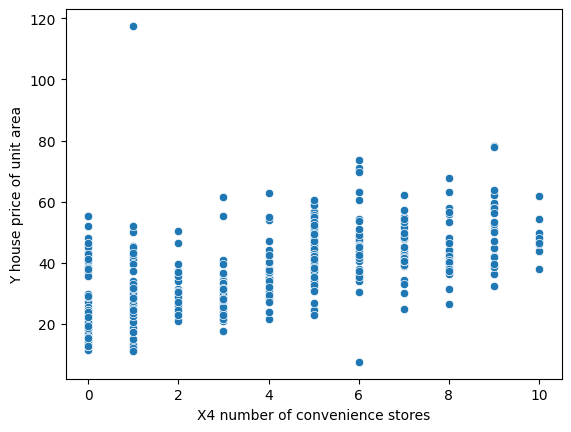

X4 number of convenience stores


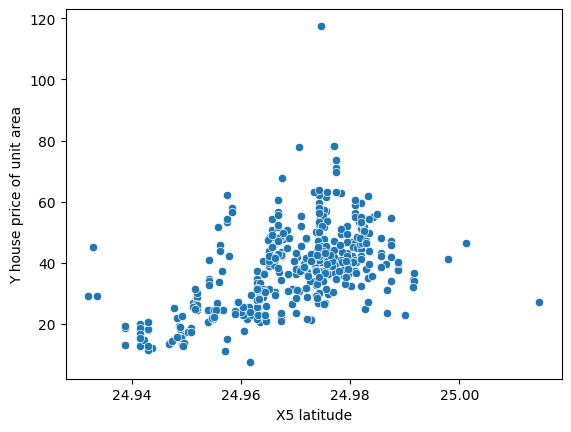

X5 latitude


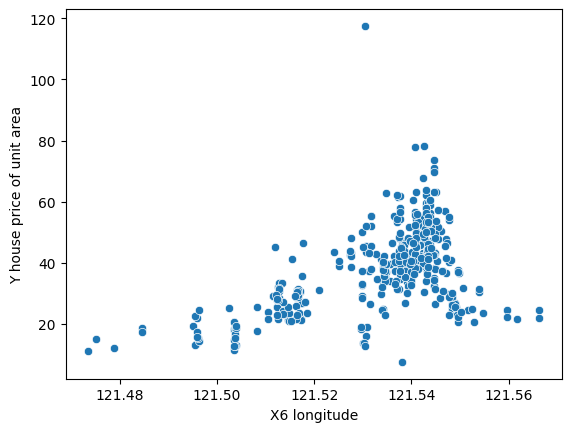

X6 longitude


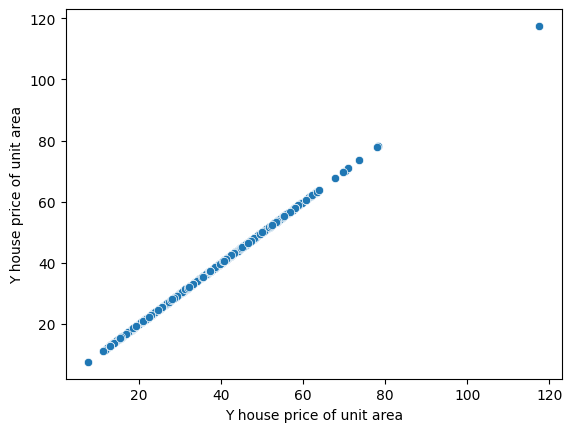

Y house price of unit area


In [21]:
for column in house_data.columns:
    sns.scatterplot(data=house_data, x=column, y="Y house price of unit area")
    plt.show()
    print(column)

In [22]:
# pip install matplotlib
# pip install seaborn - 0.12.2
# pip install scikit-learn - 1.2.2

In [ ]:
# Model Explanability
# Feature importance
# model.coef_ --- what does this mean
    # params = pd.Series(model.coef_, index=features.columns)
    # params